In [1]:
%matplotlib inline
import pandas as pd
from gpr import GPR
from ipywidgets import interact
import hublib.ui as ui
import hublib.tool

## 1D Gaussian Process Regression Notebook Demo

Notebook version by Martin Hunt (mmh@purdue.edu)

Original Author

    Ilias Bilionis (ibilion@purdue.edu)
    PredictiveScience Lab
    School of Mechanical Engineering
    Purdue University, West Lafayette, IN, USA

Powered by [The excellent GPy package from the University of Sheffield](http://sheffieldml.github.io/GPy/).



In [2]:
desc = "Data file with 2 columns of numbers.  No header. Seperator will be automatically detected."
f = ui.FileUpload("Data File", desc, width="30%")
f

In [3]:
%wait Continue

In [4]:
# If no file was chosen, use default dataset.
name = f.name
if name is None:
    name = 'test.dat'
else:
    name = 'TESTDAT.DAT'
    f.save(name)

In [5]:
data = pd.read_csv(name, sep=None, names = ['x', 'y'], engine='python')
data

,x,y
0,2.000000,0.238738
1,-1.789474,0.597727
2,-1.578947,0.529198
3,-1.368421,-1.209292
4,-1.157895,-1.814509
5,-0.947368,-0.551606
6,-0.736842,-0.054824
7,-0.526316,-0.035288
8,-0.315789,0.527409
9,-0.105263,2.550400


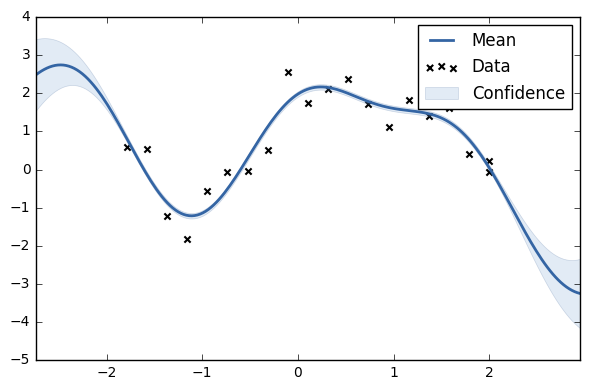

In [6]:
g = GPR(data['x'], data['y'])
interact(g.run, 
    variance=(0.001,10.0,.001), 
    length_scale=(0.001,10.0,.001), 
    noise_variance=(0.001,10.0,.001));

In [7]:
%waitdone